1. [Scalability & High Availability](#scalability--high-availability)
2. [Load Balancing](#load-balancing)
3. [Health Protocol for Health Checks](#health-protocol-for-health-checks)
4. [Types of Load Balancers](#types-of-load-balancers)
5. [Load Balancer have security groups](#load-balancer-have-security-groups)
6. [Application Load Balancer](#application-load-balancer)
7. [ELB Target Groups](#elb-target-groups)
8. [To get IP info of clients](#to-get-ip-info-of-clients)
9. [To create Application Load Balancer](#to-create-application-load-balancer)
10. [Check Application Load Balancer after creation](#check-application-load-balancer-after-creation)
11. [Advanced concepts of Application Load Balancer](#advanced-concepts-of-application-load-balancer))
12. [Network Load Balancer (NLB)](#network-load-balancer-nlb)
13. [NLB Target Groups](#nlb-target-groups)
14. [To create Network Load Balancer](#to-create-network-load-balancer)
15. [Gateway Load Balancer](#gateway-load-balancer)
16. [Elastic Load Balancer Sticky Session](#elastic-load-balancer-sticky-session)
17. [Types of cookies used for sticky sessions](#types-of-cookies-used-for-sticky-sessions)
18. [Add Stickiness to Target Group](#add-stickiness-to-target-group)
19. [ELB - Cross Zone Load Balancing](#elb---cross-zone-load-balancing)
20. [ELB - Without Cross Zone Load Balancing](#elb---without-cross-zone-load-balancing)
21. [To Check Cross-Zone in NLB & GLB](#to-check-cross-zone-in-nlb--glb)
22. [To Check Cross-Zone in ALB](#to-check-cross-zone-in-alb)
23. [SSL / TLS certificates for ELB](#ssl--tls-certificates-for-elb)
24. [SNI (Server Name Indication)](#sni-server-name-indication)
25. [Setup SSL for Load Balancer](#setup-ssl-for-load-balancer)
26. [ELB - Connection Draining](#elb---connection-draining)

#### Elastic Load Balancer:

Scalability:
- Vertical
    - increase the size of instance
    - eg: RDS , ElastiCache
- Horizontal
    - add more instances
    - Auto Scaling Group
    - Load Balancer 

High Availability:
- It goes in hand in with horizontal scaling
    - provides fail safe and prevents data loss when one instance goes out of service
    - passive (RDS Multi AZ)
    - active (horizontal scaling)
- Auto Scaling Group multi AZ
- Load Balancer multi AZ

#### Load Balancing:
- Load Balancers are servers that forward traffic to multiple servers (eg: EC2) downstream

Benefits:
- Single point of access using DNS
- Spread load across the multiple downstream instances
- Seamlessly handle failures in downstream instances
- Provide SSL termination for websites launched
- Regular health check up
- Enforce stickiness with cookies
- High availability across Zones
- Separate public traffic from private traffic

#### Health Protocol for Health Checks:
- Protocol: HTTP
- Port: 4567
- Endpoint: /health

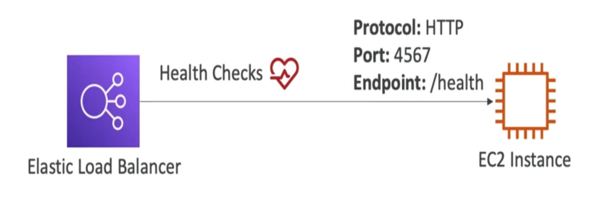

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('LB-HealthChecks.jpeg')
new_image = img.resize((600, 200))
display(new_image)

#### Types of Load Balancers:
- Classic Load Balancer: (deprecated)
    - HTTP, HTTPS, SSL (Secure TCP), TCP

- Application Load Balancer:
    - HTTP, HTTPS, WebSocket

- Network Load Balancer:
    - TCP, TLS (secure TCP), UDP

- Gateway Load Balancer:
    - operates at Layer 3 (Network Layer) - IP Protocol

Load Balancers can be internal (services) and external (websites)

#### Load Balancer have security groups:
- HTTP => TCP => 80 => 0.0.0.0/0
- HTTPS => TCP => 443 => 0.0.0.0/0

The Security groups of EC2 is linked with ELB security group
- HTTP => TCP => 80 => security group of ELB 

#### Application Load Balancer:
- Layer 7 (HTTP)
- load balancing multiple HTTP applications across machines (target group)
- load balancing multiple applications on same machine (containers)
- support for HTTP/2 and WebSocket
- supports redirects from HTTP to HTTPS
- Routing tables to different target groups
    - routing based on path in urls
    - routing based on hostname in URL
    - routing based on query parameters strings, headers

ALB (Application Load Balancers are great for microservices & container based applications)
- has port mapping feature to redirect to a dynamic port in ECS

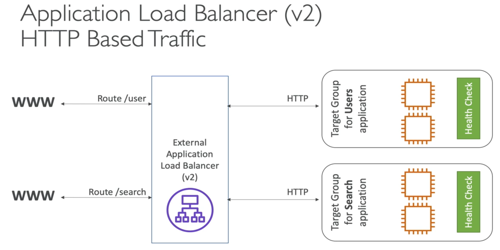

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/alb7.jpeg')
new_image = img.resize((500, 250))
display(new_image)

#### ELB Target Groups:
- EC2 Instances (managed by ASG)
- ECS Tasks (managed by ECS)
- Lambda functions
- IP address (private)

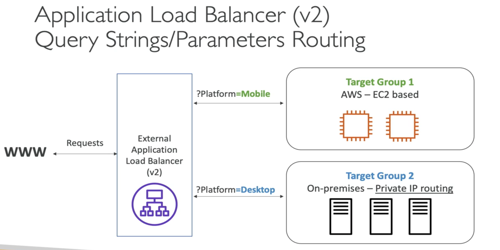

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ALB2.jpeg')
new_image = img.resize((500, 250))
display(new_image)

- ALB can route traffic to multiple target groups
- Health checks are at target group level

#### To get IP info of clients:
- Application load balancer will have a fixed hostname
- Application server dont see the Client IP directly (to get the IP address of clients connected to your website)
    - true IP inserted in header X-Forwarded-For
    - get port (X-Forwarded-Port) and proto (X-Forwarded-Proto)


#### To create Application Load Balancer:
- Launch EC2 instance
- Go to Load Balancer option in EC2 page
    - Create load balancer
        - create Application Load Balancer (for HTTP, HTTPS)
            - name
            - scheme
                - internet facing
                - internal
            - IP type
            - Network mapping
                - select AZs
            - Security Group
                - create
            - Listeners and Routing
                - HTTP => 80 => select target group
                    - create target group
                        - basic configuration (target type)
                        - name
                        - Protocol and port (HTTP & 80)
                        - HTTP version
                        - Health Checks
                        - Click Next
                        - Register targets
                            - select instances
                                - include as pending below
                            - review target
                            - create target
            - Click on Create Load Balancer


#### Check Application Load Balancer after creation:
- Click on the load balancer option within EC2
    - name
    - DNS name
    - VPC id
    - AZs info
    - type

#### Advanced concepts of Application Load Balancer:

Avoid HTTP from anywhere access for instances:
- Edit the inbound rules for HTTP from 0.0.0.0/0 to the security group from load balancer

Also add Listener rules in ELB:
- Select the load balancer and scroll down to Rules tab
    - Add rule
        - name
        - Add condition
            - enable rule routing based on paths, headers, IP, hostname, query string, request method, etc
            - Next
        - Actions
            - forward to TG
            - redirect to URL
            - return fixed response
        - Rule priority
            - 1 - Highest
            - 50000 - Lowest
            - Next
        - Review
            - Create

#### Network Load Balancer (NLB):
- Layer 4 (TCP, UDP, TLS)
- ultra-low latency
- handle millions of requests
- NLB has one static IP per AZ, supports Elastic IP (whitelisting specific IPs)

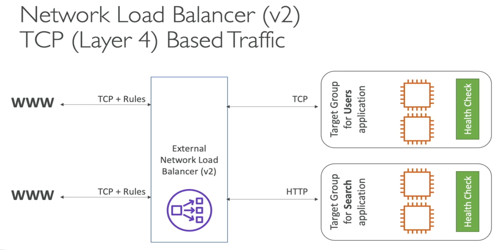

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/network-load-balancer.jpeg')
new_image = img.resize((500, 250))
display(new_image)

#### NLB Target Groups:
- EC2 Instances
- Application Load Balancer
- IP address (private)
- Health check performed by NLB TGs support for HTTP, TCP, HTTPS protocols

Efficient combination of NLB with ALB:
- NLB => fixed IPs
- ALB => listener rules for traffic routing

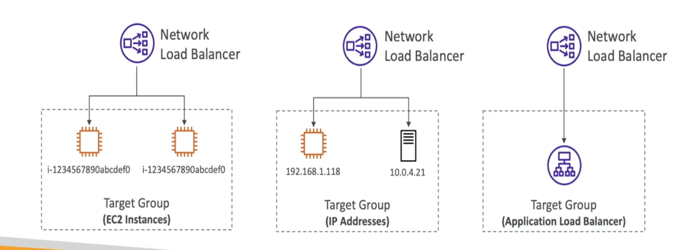

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/NLB.jpeg')
new_image = img.resize((700, 250))
display(new_image)

#### To create Network Load Balancer:
- Follow the similar steps for NLB as ALB
- Do not forget to add the NLB security group into the security group of the instances to work

#### Gateway Load Balancer:
- Layer 3 (Network Layer)
- Deploy, scale and manage 3rd party fleet of network virtual appliances in AWS
    - Firewall, Intrusion, Detection & Prevention Systems, payload manipulation, Deep Packet inspection system, etc
- GENEVE protocol, port 6081
- combines the following function
    - transparent network gateway
        - single entry/exit for all traffic
    - load balancer
        - distributes the traffic

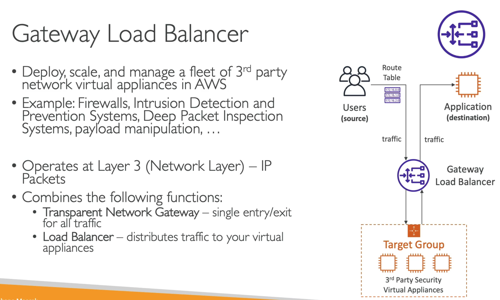

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/gateway-load-balancer.jpeg')
new_image = img.resize((500, 300))
display(new_image)

#### Elastic Load Balancer Sticky Session:
- Sticky Session (Session Affinity)
    - Once a user connects the EC2 instance A via load balancer, the next request will also connect the same instance
    - works in CLB, NLB, ALB
    - cookie is used stickiness with expiry date
    - use case: make sure user doesn't lose session data
    - enabling stickiness will bring imbalances

#### Types of cookies used for sticky sessions:
- Application-based
    - Custom cookie
        - Generated by target
        - include any custom attribute required by app
        - cookie name must be specified individually for each target group
    - Application cookie
        - Generated by load balancer
        - name: AWSALBAPP
- Duration-based
    - Generated by load balancer
    - name: AWSALB for ALB & AWSELB for CLB

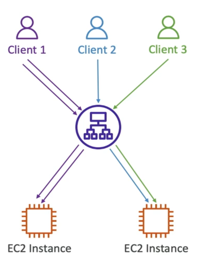

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/Sticky.jpeg')
new_image = img.resize((200, 270))
display(new_image)

#### Add Stickiness to Target Group:
- Select the load balancer target group
- Click on the "Actions" and select "Edit attributes"
    - Stickiness
        - type
            - load balancer (duration type)
            - application

#### ELB - Cross Zone Load Balancing:
- Each load balancers will distribute evenly across all instances in all AZz

ALB:
- by default enabled cross zone
- can be disabled at target group level
- no charges

NLB:
- by default not enabled cross zone
- charged for inter AZ data

GLB:
- by default not enabled cross zone
- charged for inter AZ data

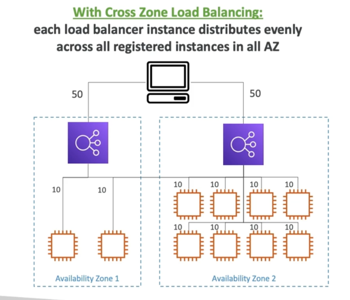

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/CrossZone.jpeg')
new_image = img.resize((350, 300))
display(new_image)

#### ELB - Without Cross Zone Load Balancing:
- the load balancer distributes evenly at node of load balancer

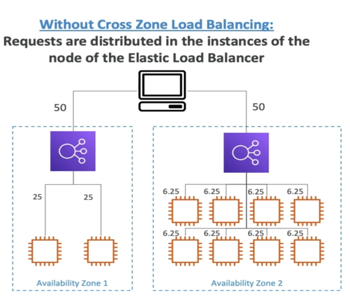

In [18]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/WithoutCrossZone.jpeg')
new_image = img.resize((350, 300))
display(new_image)

#### To Check Cross-Zone in NLB & GLB:
- Go to NLB/GLB console, select the NLB/GLB
- Go to attributes tab
    - Cross zone load balancing
        - Edit
            - Enable
            - Save

#### To Check Cross-Zone in ALB:
- Go to ALB console, select the ALB
- Go to attributes tab
    - Cross zone load balancing
        - Edit
            - Cannot disable here
- Go to Target Group of the ALB
    - Go to attributes tab
        - Cross Zone load balancing
        - Save

#### SSL / TLS certificates for ELB:
- SSL certificate (Secure Socket Layer -> encrypt connections):
    - allows traffic between LB and client to be encrypted in transit (in-flight)
- TLS certificate (Transport Layer Security) sometimes referred as SSL
- Public SSL are authorized by Certificate Authorities (CA)
- Private SSL are self-signed (not trusted by default)
    - GlobalSign, GoDaddy, etc.
- SSL certificates have expiry date and should be renewed
- load balancer uses X.509 certificates
- manage SSL certificates using ACM (AWS Certificate Manager)
    - can upload own certificate to ACM
- HTTPS listener
    - specify default listener
    - add optional list of certs to support multiple domains
    - Clients use SNI (Server Name Indication) to specify the hostname they reach
    - ability to specify security policy to support older versions of SSL/TLS (legacy clients)

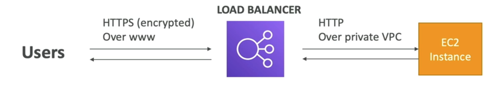

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/SSL.jpeg')
new_image = img.resize((500, 100))
display(new_image)

#### SNI (Server Name Indication):
- solves the problem of loading multiple SSL certificates onto one Web Server
- newer protocol, requires the client to indicate the hostname of the target server during initial SSL handshake
- The server will find the correct certificate or return the default one

Note:
- Only works for ALB & NLB, Cloudfront

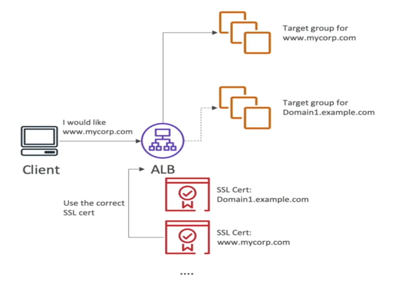

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/SSL2.jpeg')
new_image = img.resize((400, 300))
display(new_image)

#### Setup SSL for Load Balancer:
ALB:
- Select the ALB from LB console
- Go to Listener tab
    - Add Listener
        - Port
        - Protocol
        - Target Group
        - Security policy 
        - SSL Certificate
            - IAM
            - ACM
            - Import
                - SSL private key
                - SSL Body
                - Chain
        - Save

NLB:
- Select the NLB from LB console
- Go to Listener tab
    - Add Listener
        - Port
        - Protocol
            - TLS
        - Target Group
        - Security policy 
        - SSL Certificate
            - IAM
            - ACM
            - Import
                - SSL private key
                - SSL Body
                - Chain
        - Save

#### ELB - Connection Draining:
- Naming:
    - Connection Draining - CLB
    - De-registration Delay - ALB & NLB

- gives time for inflight requests to complete while instance is de-registering or unhealthy
- once timed out, ELB will stop sending request to EC2 instance which is de-registering
- timeout seconds: 1 - 3600 seconds (default 300)
- can be disabled if we set the value to 0
- set the value low if a short request

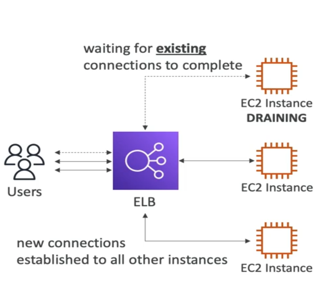

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/ConnectionDraining.jpeg')
new_image = img.resize((330, 300))
display(new_image)